# Resampling Methods

Resampling methods involve the iterative extraction of sample data from a training set, followed by refitting a model of interest on each sample. This iterative process yields additional information about the fitted model. For instance, it allows us to assess the variability of a linear regression fit and compare the results. Two widely used resampling methods are [James et al., 2023]:

## Cross-Validation (CV)

Cross-Validation is a powerful resampling technique used to assess the performance of predictive models. Particularly valuable when dealing with limited data, it allows you to estimate how well your model will perform on unseen data points, providing a glimpse into its generalization capabilities [James et al., 2023].

In the context of k-fold Cross-Validation, a commonly used approach, the dataset is divided into k subsets or "folds." The steps for performing k-fold Cross-Validation are as follows:

1. **Partitioning Data:**
   - Divide the dataset into k equally sized subsets, referred to as $D_1, D_2, \ldots, D_k$.

2. **Iterative Training and Testing:**
   - For each fold $D_i$, treat it as the test set while combining the remaining folds $D_1 \cup \ldots \cup D_{i-1} \cup D_{i+1} \cup \ldots \cup D_k$ to form the training set.
   - Train your model on the training set and evaluate its performance on the test set.
   - Repeat this process for each fold, resulting in k iterations.

3. **Performance Metrics:**
   - For each iteration, compute a performance metric (e.g., accuracy, mean squared error) based on your model's predictions on the test set.

4. **Overall Performance Estimate:**
   - Calculate the average of the performance metrics obtained from the k iterations. This average provides an overall estimate of your model's performance.

Mathematically, let's consider a performance metric $P$ (e.g., accuracy) and a model $M$ that maps input features $X$ to predictions $\hat{y}$. For each fold $D_i$:

- Train model $M$ on the training set, excluding fold $D_i$: $M_i = M.fit(X_{\text{train}_i}, y_{\text{train}_i})$
- Evaluate model $M_i$ on fold $D_i$ (the test set): $P_i = P(M_i.predict(X_{\text{test}_i}, y_{\text{test}_i})$

The average performance estimate $\bar{P}$ is computed as:

\begin{equation}
\bar{P} = \frac{1}{k} \sum_{i=1}^{k} P_i
\end{equation}

Cross-Validation offers a realistic assessment of how well your model generalizes to new data. It goes beyond training error, providing a robust performance estimate crucial for effective model assessment and selection [James et al., 2023].

<font color='Blue'><b>Example</b></font>: Consider a dataset $S$ containing 6 samples, denoted as {$x_1$, $x_2$, $x_3$, $x_4$, $x_5$, $x_6$}, and the objective is to perform a 3-fold cross-validation.

To begin, the dataset $S$ is divided into 3 subsets in a randomized manner, resulting in:

* Subset 1: $S_1 = \{x_1, x_2\}$
* Subset 2: $S_2 = \{x_3, x_4\}$
* Subset 3: $S_3 = \{x_5, x_6\}$

In the subsequent steps, the machine-learning model is trained and evaluated 3 times. During each iteration, two of the subsets are combined to form the training set, while the remaining subset serves as the test set. The process unfolds as follows:

**Iteration 1:**
- <font color='Green'><b>Training Set:</b></font> $S_1 = \{x_1, x_2\}$, $S_2 = \{x_3, x_4\}$
- <font color='Blue'><b>Test Set:</b></font> $S_3 = \{x_5, x_6\}$

**Iteration 2:**
- <font color='Green'><b>Training Set:</b></font> $S_2 = \{x_3, x_4\}$, $S_3 = \{x_5, x_6\}$
- <font color='Blue'><b>Test Set:</b></font> $S_1 = \{x_1, x_2\}$

**Iteration 3:**
- <font color='Green'><b>Training Set:</b></font> $S_1 = \{x_1, x_2\}$, $S_3 = \{x_5, x_6\}$
- <font color='Blue'><b>Test Set:</b></font> $S_2 = \{x_3, x_4\}$

<center>
<img src="https://raw.githubusercontent.com/HatefDastour/hatefdastour.github.io/master/_notes/Introduction_to_Digital_Engineering/_images/CV.png" alt="picture" width="500">
</center>

<font color='Blue'><b>Example</b></font>: Returning to the Iris dataset, we employ a cross-validation strategy with a 5-fold partitioning scheme. In this approach, the dataset is divided into five subsets of roughly equal size, and the model is trained and evaluated five times. Each time, a different subset is held out as the test set, while the remaining four subsets are combined to form the training set. This process ensures that every data point is used for both training and testing, leading to a more robust evaluation of the model's performance.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors

# Initialize KFold cross-validator
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store train and test scores for each fold
train_scores = []
test_scores = []

# Perform Cross-Validation
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)

    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)

# Print the Train and Test Scores for each fold
for fold in range(n_splits):
    print(f"Fold {fold + 1}: Train Score = {train_scores[fold]:.4f}, Test Score = {test_scores[fold]:.4f}")

# Calculate and print the average train and test scores
average_train_score = np.mean(train_scores)
average_test_score = np.mean(test_scores)
print(30*'_')
print("Mean Train Score: %.5f" % average_train_score)
print("Mean Test Score: %.5f" % average_test_score)
print(30*'_')

Fold 1: Train Score = 0.9500, Test Score = 1.0000
Fold 2: Train Score = 0.9667, Test Score = 0.9667
Fold 3: Train Score = 0.9583, Test Score = 0.9667
Fold 4: Train Score = 0.9833, Test Score = 0.9333
Fold 5: Train Score = 0.9583, Test Score = 0.9667
______________________________
Mean Train Score: 0.96333
Mean Test Score: 0.96667
______________________________


On the other hand, observe that,

In [2]:
import pandas as pd

# Create a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Use groupby to count observations by species
species_counts = iris_df.groupby('species').size().to_frame('Count')

print("Number of Observations by Species:")
display(species_counts.T)

Number of Observations by Species:


species,setosa,versicolor,virginica
Count,50,50,50


Now, let's invistigate the previous splitss


In [3]:
# Perform Cross-Validation
C = 0
for _, test_idx in kf.split(X):
    print('Fold %i' % C)
    df = pd.Series(iris.target_names[iris.target][test_idx])
    display(df.value_counts().to_frame('Count').T)
    C+=1

Fold 0


,virginica,setosa,versicolor
Count,11,10,9


Fold 1


,setosa,versicolor,virginica
Count,13,10,7


Fold 2


,setosa,versicolor,virginica
Count,12,10,8


Fold 3


,virginica,versicolor,setosa
Count,12,10,8


Fold 4


,virginica,versicolor,setosa
Count,12,11,7


When working with a small dataset like the Iris dataset, which has only 150 samples, the choice of cross-validation strategy becomes even more crucial. Using StratifiedKFold for splitting a small dataset into train and test sets offers several benefits:

1. **Preserving Data Distribution**: The Iris dataset contains three classes (species) with 50 samples each. If you use simple random splitting without stratification, there's a chance that one or more classes might be underrepresented or absent in either the train or test set. StratifiedKFold ensures that each fold maintains the original class distribution, which is particularly important when working with a limited number of samples.

2. **More Reliable Performance Estimates**: In small datasets, individual data points can have a larger impact on model training and evaluation. By using stratification, you're making sure that each fold accurately represents the underlying data distribution. This leads to more reliable performance estimates and reduces the risk of overfitting or underestimation.

3. **Preventing Overfitting**: Small datasets are prone to overfitting, especially if you're using a complex model. Using stratified cross-validation helps in mitigating this risk by providing consistent evaluation across folds and ensuring that each fold has a representative distribution of classes.

4. **Robustness to Variability**: Small datasets often have more variability in terms of data distribution and noise. StratifiedKFold provides a way to handle this variability by maintaining class balance, leading to a more stable evaluation process.

5. **Comparable Results**: StratifiedKFold ensures that performance metrics are calculated over similar data distributions for each fold. This makes your results more comparable and interpretable.

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors

# Initialize StratifiedKFold cross-validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store train and test scores for each fold
train_scores = []
test_scores = []

# Perform Cross-Validation
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)

    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)

# Print the Train and Test Scores for each fold
for fold in range(n_splits):
    print(f"Fold {fold + 1}: Train Score = {train_scores[fold]:.4f}, Test Score = {test_scores[fold]:.4f}")

# Calculate and print the average train and test scores
average_train_score = np.mean(train_scores)
average_test_score = np.mean(test_scores)
print(30*'_')
print("Mean Train Score: %.5f" % average_train_score)
print("Mean Test Score: %.5f" % average_test_score)
print(30*'_')

Fold 1: Train Score = 0.9500, Test Score = 1.0000
Fold 2: Train Score = 0.9583, Test Score = 0.9667
Fold 3: Train Score = 0.9917, Test Score = 0.8667
Fold 4: Train Score = 0.9500, Test Score = 1.0000
Fold 5: Train Score = 0.9583, Test Score = 0.9333
______________________________
Mean Train Score: 0.96167
Mean Test Score: 0.95333
______________________________


Observe that now:

In [5]:
# Perform Cross-Validation
C = 0
for _, test_idx in skf.split(X, y):
    print('Fold %i' % C)
    df = pd.Series(iris.target_names[iris.target][test_idx])
    display(df.value_counts().to_frame('Count').T)
    C+=1

Fold 0


,setosa,versicolor,virginica
Count,10,10,10


Fold 1


,setosa,versicolor,virginica
Count,10,10,10


Fold 2


,setosa,versicolor,virginica
Count,10,10,10


Fold 3


,setosa,versicolor,virginica
Count,10,10,10


Fold 4


,setosa,versicolor,virginica
Count,10,10,10


### Leave-One-Out Cross-Validation (LOOCV)

Leave-One-Out Cross-Validation is a special case of k-fold Cross-Validation where \(k\) is set to the number of samples in the dataset. In other words, for each iteration of LOOCV, only one sample is used as the test set, and the rest of the samples form the training set. LOOCV is particularly useful when dealing with a small dataset since it maximizes the use of available data for testing purposes.

Here's how LOOCV works:

1. **Iteration:**
   - For each data point in the dataset, designate it as the test instance, and use the remaining \(n-1\) instances as the training set.

2. **Model Training and Testing:**
   - Train your model on the \(n-1\) training instances.
   - Evaluate the model's performance on the single test instance.
   - Calculate the performance metric (e.g., accuracy, mean squared error) for this iteration.

3. **Repeat for All Data Points:**
   - Repeat steps 1 and 2 for all \(n\) data points in the dataset.

4. **Overall Performance Estimate:**
   - Calculate the average performance metric across all \(n\) iterations. This provides an overall estimate of the model's performance.

**Advantages of LOOCV:**
- Utilizes the entire dataset for testing, ensuring maximum information is used.
- Provides a nearly unbiased estimate of the model's performance, as each instance serves as both training and test data.
- Particularly useful for small datasets where other forms of cross-validation may result in too few instances for testing.

**Disadvantages of LOOCV:**
- Can be computationally expensive for large datasets, as it requires fitting the model \(n\) times.
- May lead to high variance estimates due to the potential similarity between training and test instances in each iteration.

LOOCV provides a reliable estimate of a model's performance, especially when dealing with limited data. While it can be more computationally intensive, its comprehensiveness and minimal bias make it a valuable tool for model assessment.

Example: In leave-one-out (LOO) cross-validation, we iteratively train our machine-learning model n times, where n represents the size of our dataset. During each iteration, a single sample is set aside as the test set, while the remaining samples are used for training the model.

LOO can be thought of as an extreme case of k-fold cross-validation, where the value of **k** becomes equal to **n**. If we apply the LOO approach to the previous example, we'll create 6 distinct test subsets:

- Subset 1: $S_1 = \{x_1\}$
- Subset 2: $S_2 = \{x_2\}$
- Subset 3: $S_3 = \{x_3\}$
- Subset 4: $S_4 = \{x_4\}$
- Subset 5: $S_5 = \{x_5\}$
- Subset 6: $S_6 = \{x_6\}$

For each of these subsets, we perform an iteration. During iteration **i = 1, 2, ..., 6**, we use the dataset **$S$** without the samples from **$S_i$** (denoted as **$S \setminus S_i$**) as the training data. Then, we evaluate the model's performance on **$S_i$**, which serves as the test set:

**Iteration 1:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_1$
- <font color='Blue'><b>Test Set:</b></font> $S_1 = \{x_1\}$

**Iteration 2:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_2$
- <font color='Blue'><b>Test Set:</b></font> $S_2 = \{x_2\}$

**Iteration 3:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_3$
- <font color='Blue'><b>Test Set:</b></font> $S_3 = \{x_3\}$

**Iteration 4:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_4$
- <font color='Blue'><b>Test Set:</b></font> $S_4 = \{x_4\}$

**Iteration 5:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_5$
- <font color='Blue'><b>Test Set:</b></font> $S_5 = \{x_5\}$

**Iteration 6:**
- <font color='Green'><b>Training Set:</b></font> $S \setminus S_6$
- <font color='Blue'><b>Test Set:</b></font> $S_6 = \{x_6\}$

In each iteration, the model learns from all but one data point and then gets evaluated on the held-out sample. This process provides a detailed assessment of the model's performance for every individual sample in the dataset.

<center>
<img src="https://raw.githubusercontent.com/HatefDastour/hatefdastour.github.io/master/_notes/Introduction_to_Digital_Engineering/_images/LeaveOneOut.png" alt="picture" width="400">
<br>
<b>Figure</b>: An example of using KKN.
</center>

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Lists to store train and test scores for each iteration
train_scores = []
test_scores = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)

    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)

# Calculate and print the average train and test scores
average_train_score = np.mean(train_scores)
average_test_score = np.mean(test_scores)
print(30 * '_')
print("Mean Train Score: %.5f" % average_train_score)
print("Mean Test Score: %.5f" % average_test_score)
print(30 * '_')

______________________________
Mean Train Score: 0.96009
Mean Test Score: 0.96000
______________________________


Note that:

In [7]:
# Perform Cross-Validation
C = 0
for _, test_idx in loo.split(X, y):
    print('Fold %i' % C)
    print(iris.target_names[iris.target][test_idx])
    C+=1
    # Only the first 5 folds
    if C == 5:
        break

Fold 0
['setosa']
Fold 1
['setosa']
Fold 2
['setosa']
Fold 3
['setosa']
Fold 4
['setosa']


## Bootstrap Method

The Bootstrap method is a powerful resampling technique designed to estimate the sampling distribution of a given statistic, such as the mean, median, or standard deviation. It offers a robust way to assess the variability and uncertainty associated with a statistic, without relying on specific assumptions about the underlying data distribution [James et al., 2023]:.

Here's a detailed breakdown of the Bootstrap method:

1. **Bootstrap Sample Generation:**
   - For each iteration $b = 1, 2, \ldots, B$, create a new bootstrap sample $x_1^*, x_2^*, \ldots, x_n^*$ by randomly selecting $n$ observations with replacement from the original dataset $x_1, x_2, \ldots, x_n$. This allows for duplicates within the sample.

2. **Statistic Calculation:**
   - Calculate the statistic of interest $T^*$ based on the bootstrap sample: $T^* = g(x_1^*, x_2^*, \ldots, x_n^*)$. Here, $g$ is a function that computes the desired statistic. For instance, if estimating the mean, $T^* = \frac{1}{n} \sum_{i=1}^{n} x_i^*$.

3. **Repeat and Collect Statistics:**
   - Repeat steps 1 and 2 for a significant number of iterations $B$, resulting in a collection of bootstrap statistics: $T_1^*, T_2^*, \ldots, T_B^*$.

4. **Estimating Variability:**
   - The distribution of the calculated bootstrap statistics $T_1^*, T_2^*, \ldots, T_B^*$ approximates the sampling distribution of the original statistic $T$.
   - From this distribution, you can calculate various measures of variability, such as confidence intervals, standard errors, or percentiles.

Bootstraping, in the context of statistics and data analysis, refers to a resampling technique that helps us make inferences about a population based on a sample of data. It's particularly useful when we want to understand the variability of a statistic (such as the mean or standard deviation) and estimate its properties, like confidence intervals, when the underlying population distribution might be unknown or complex.

Here's a simple explanation of bootstrapping:

1. **The Problem:** Imagine you have a small dataset, and you want to understand something about a specific statistic (like the mean) of the entire population from which the data was drawn. However, drawing conclusions directly from your limited sample might not accurately reflect the true characteristics of the population.

2. **Resampling:** Bootstrapping addresses this by simulating the process of drawing samples from your original data. To do this, you randomly select data points from your original dataset with replacement, creating a new "bootstrap sample" of the same size as your original data. Because you're sampling with replacement, some data points will appear multiple times in the bootstrap sample, while others might not appear at all.

3. **Calculating Statistic:** For each bootstrap sample, you calculate the desired statistic (e.g., mean) based on the data points in that sample.

4. **Repeated Process:** You repeat the resampling process (step 2 and 3) a large number of times (often thousands of times). Each time, you're essentially creating a simulated dataset by drawing samples from your original data with replacement.

5. **Inference:** By analyzing the distribution of the calculated statistic across all these bootstrap samples, you can make inferences about the population. For instance, you can estimate the variability of the statistic (by looking at its standard deviation), calculate confidence intervals, or even visualize the distribution itself.

6. **Advantages:** Bootstrapping is powerful because it doesn't rely on assumptions about the shape or parameters of the population distribution. It works well for small sample sizes and can provide valuable insights even when traditional statistical methods might not be applicable.

To summarize, bootstrapping is a resampling technique that helps us understand the characteristics of a population by repeatedly creating simulated datasets from our original data and calculating statistics of interest on these simulated datasets. It's a versatile and useful tool in situations where traditional statistical methods might not be suitable.

Original Mean: 1.46200
Bootstrap Mean 1.46264
95% Confidence Interval: [1.414 1.508]


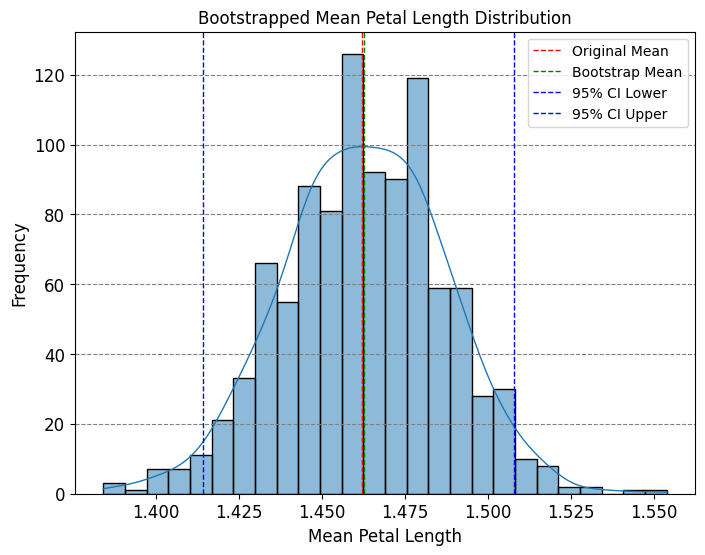

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Files/mystyle.mplstyle')

# Load the Iris dataset from Seaborn
iris = sns.load_dataset("iris")

# Choose a specific iris species (let's say "setosa")
species_data = iris[iris["species"] == "setosa"]
petal_length_data = species_data["petal_length"]

# Number of bootstrap samples
num_bootstraps = 1000

# Initialize an array to store bootstrap sample means
bootstrap_means = np.zeros(num_bootstraps)

# Perform bootstrapping
for i in range(num_bootstraps):
    bootstrap_sample = np.random.choice(petal_length_data,
                                        size=len(petal_length_data), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate the 95% confidence interval for the mean
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram of bootstrap sample means
sns.histplot(bootstrap_means, kde=True, ax=ax)
ax.axvline(x=np.mean(petal_length_data), color='r', linestyle='dashed', label='Original Mean')
ax.axvline(x=np.mean(bootstrap_means), color='g', linestyle='dashed', label='Bootstrap Mean')
ax.axvline(x=confidence_interval[0], color='b', linestyle='dashed', label='95% CI Lower')
ax.axvline(x=confidence_interval[1], color='b', linestyle='dashed', label='95% CI Upper')

# Set various plot settings in one call
ax.set(xlabel="Mean Petal Length", ylabel="Frequency",
       title="Bootstrapped Mean Petal Length Distribution")
ax.legend()
ax.xaxis.grid(False)

print("Original Mean: %.5f" % np.mean(petal_length_data))
print("Bootstrap Mean %.5f" % np.mean(bootstrap_means))
print("95% Confidence Interval:", confidence_interval)

Let's break down the code step by step:

1. **Import Libraries:**
   - `numpy` is imported as `np` for numerical operations.
   - `seaborn` is imported as `sns` for data visualization.
   - `matplotlib.pyplot` is imported as `plt` for creating plots.

2. **Load the Dataset:**
   - The Iris dataset is loaded using `sns.load_dataset("iris")`.

3. **Data Preparation:**
   - A specific species ("setosa") from the dataset is chosen.
   - The "petal_length" data for the chosen species is extracted.

4. **Number of Bootstrap Samples:**
   - `num_bootstraps` is set to 1000, indicating the number of bootstrap samples to generate.

5. **Initialize Arrays:**
   - An array named `bootstrap_means` is initialized to store the means of each bootstrap sample.

6. **Perform Bootstrapping:**
   - A loop runs `num_bootstraps` times.
   - For each iteration, a bootstrap sample is created by randomly selecting data points from `petal_length_data` with replacement.
   - The mean of the bootstrap sample is calculated and stored in the `bootstrap_means` array.

7. **Calculate Confidence Interval:**
    The code snippet `np.percentile(bootstrap_means, [2.5, 97.5])` calculates the percentiles of the `bootstrap_means` array. In particular, it calculates the 2.5th and 97.5th percentiles of the distribution, which correspond to the lower and upper bounds of a 95% confidence interval.

    In the context of bootstrapping and statistical inference, the calculated confidence interval provides an estimate of the range in which the true population parameter (in this case, the mean) is likely to fall. Here's how it works:

    1. `bootstrap_means`: This is an array that contains the means of various bootstrap samples. Each value in this array represents the mean of a specific bootstrap sample.

    2. `np.percentile(bootstrap_means, [2.5, 97.5])`: This function call calculates the specified percentiles from the `bootstrap_means` array. Percentiles are values that divide a dataset into corresponding percentages. In this case, the code calculates the 2.5th and 97.5th percentiles.

       - The 2.5th percentile represents the value below which 2.5% of the data falls. It gives the lower bound of the confidence interval.
       - The 97.5th percentile represents the value below which 97.5% of the data falls. It gives the upper bound of the confidence interval.

    3. The calculated percentiles provide the lower and upper bounds of a confidence interval. Specifically, the range between the 2.5th percentile and the 97.5th percentile is a 95% confidence interval for the parameter being estimated (in this case, the mean of the population).


8. **Create Plot:**
   - A new figure and axis are created using `plt.subplots()`.
   - The histogram of bootstrapped means is plotted using `sns.histplot()`, with a kernel density estimate (KDE) overlaid.
   - Dashed vertical lines are added to indicate the original mean, bootstrap mean, and lower and upper bounds of the confidence interval.

9. **Set Plot Settings:**
   - Various plot settings such as labels, title, and legends are set using the `ax.set()` function.

10. **Display the Plot:**
    - The plot is displayed using `plt.show()`.

11. **Print Results:**
    - The original mean of "petal_length_data", bootstrap mean, and the calculated confidence interval are printed using `print()` statements.

The code essentially demonstrates how bootstrapping can be used to estimate the mean of a dataset, and how the distribution of bootstrapped means provides insights into the variability of the estimate. The confidence interval helps us understand the range within which the true population mean is likely to fall.

In [10]:
import pandas as pd
Link = 'https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=27211&Year=2022&Month=1&Day=1&time=&timeframe=2&submit=Download+Data'

df = pd.read_csv(Link, usecols = ['Date/Time', 'Year', 'Month' , 'Mean Temp (°C)'])
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df = df.rename(columns = {'Date/Time':'Date'})
display(df)

,Date,Year,Month,Mean Temp (°C)
0,2022-01-01,2022,1,-13.4
1,2022-01-02,2022,1,-7.0
2,2022-01-03,2022,1,-20.0
3,2022-01-04,2022,1,-27.0
4,2022-01-05,2022,1,-27.2
...,...,...,...,...
360,2022-12-27,2022,12,1.4
361,2022-12-28,2022,12,-4.9
362,2022-12-29,2022,12,-8.2
363,2022-12-30,2022,12,-2.7



January
Original Mean: -5.67419
Bootstrap Mean -5.76780
95% Confidence Interval: [-10.0258871  -2.1825   ]

February
Original Mean: -5.67419
Bootstrap Mean -5.73563
95% Confidence Interval: [-9.78483871 -2.14072581]

March
Original Mean: -5.67419
Bootstrap Mean -5.72588
95% Confidence Interval: [-9.66282258 -2.22580645]

April
Original Mean: -5.67419
Bootstrap Mean -5.60038
95% Confidence Interval: [-9.0908871  -1.90580645]

May
Original Mean: -5.67419
Bootstrap Mean -5.64308
95% Confidence Interval: [-9.64556452 -1.98693548]

June
Original Mean: -5.67419
Bootstrap Mean -5.68622
95% Confidence Interval: [-9.4383871  -2.09524194]

July
Original Mean: -5.67419
Bootstrap Mean -5.68077
95% Confidence Interval: [-9.51733871 -2.11927419]

August
Original Mean: -5.67419
Bootstrap Mean -5.69859
95% Confidence Interval: [-9.46580645 -2.17419355]

September
Original Mean: -5.67419
Bootstrap Mean -5.74335
95% Confidence Interval: [-9.69040323 -2.17604839]

October
Original Mean: -5.67419
Bootstr

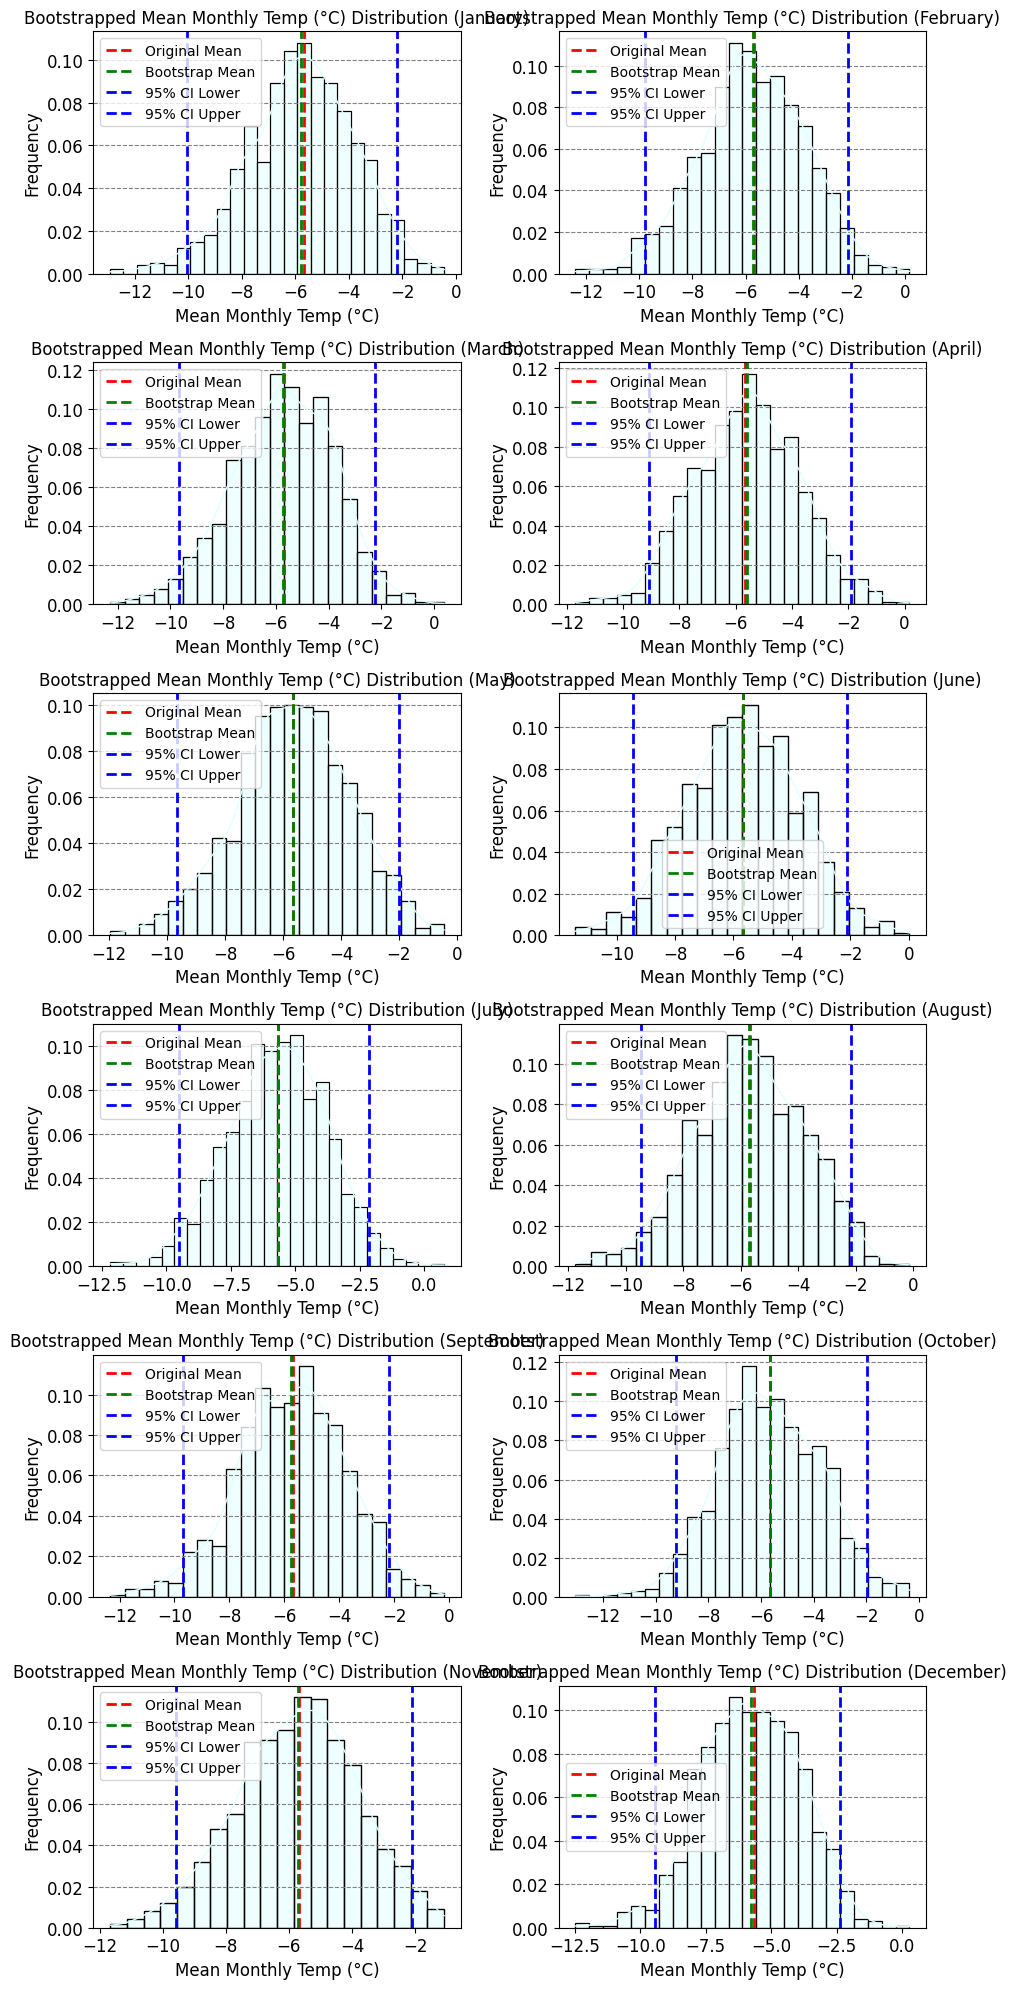

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

fig, axes = plt.subplots(6, 2, figsize=(9.5, 20))
axes = axes.ravel()
for m, ax in enumerate(axes, start=1):

    df = df.loc[df.Month == 1]
    mean_temp_data = df['Mean Temp (°C)']

    # Number of bootstrap samples
    num_bootstraps = 1000

    # Initialize an array to store bootstrap sample means
    bootstrap_means = np.zeros(num_bootstraps)

    # Perform bootstrapping
    for i in range(num_bootstraps):
        bootstrap_sample = np.random.choice(mean_temp_data,
                                            size=len(mean_temp_data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)

    # Calculate the 95% confidence interval for the mean
    confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

    # Plot the histogram of bootstrap sample means
    sns.histplot(bootstrap_means, kde=True, ax=ax, color = 'LightCyan', stat = 'probability')
    ax.axvline(x=np.mean(mean_temp_data), color='r', linestyle='dashed', lw = 2, label='Original Mean')
    ax.axvline(x=np.mean(bootstrap_means), color='g', linestyle='dashed', lw = 2, label='Bootstrap Mean')
    ax.axvline(x=confidence_interval[0], color='b', linestyle='dashed', lw = 2, label='95% CI Lower')
    ax.axvline(x=confidence_interval[1], color='b', linestyle='dashed', lw = 2, label='95% CI Upper')

    # Set various plot settings in one call
    ax.set(xlabel = "Mean Monthly Temp (°C)", ylabel="Frequency",
        title= f"Bootstrapped Mean Monthly Temp (°C) Distribution ({calendar.month_name[m]})")
    ax.legend()
    print(f'\n{calendar.month_name[m]}')
    print("Original Mean: %.5f" % np.mean(mean_temp_data))
    print("Bootstrap Mean %.5f" % np.mean(bootstrap_means))
    print("95% Confidence Interval:", confidence_interval)
    ax.xaxis.grid(False)

plt.tight_layout()